# Proyek Analisis Data: Air-quality-dataset
- **Nama:** Andi Zahrina Athirah Ahmad
- **Email:** azahrinathiraha051@gmail.com
- **ID Dicoding:** azahrnath15

## Menentukan Pertanyaan Bisnis

- **Bagaimana tren tingkat polusi udara (PM2.5) di berbagai lokasi dari waktu ke waktu?**
  - Pengguna dapat  melihat tren kualitas udara di berbagai stasiun pemantauan, memahami perubahan dari tahun ke tahun, serta mengidentifikasi lokasi dengan polusi tertinggi dan terendah.

- **Bagaimana tingkat polusi udara (PM2.5) bervariasi di berbagai stasiun berdasarkan polutan utama (SO2, NO2, O3, CO)?**
  - Menganalisis hubungan antara polutan-polutan ini dengan PM2.5 di berbagai stasiun dapat memberikan wawasan mengenai sumber utama polusi di masing-masing lokasi dan membantu dalam mengidentifikasi polutan yang paling berpengaruh terhadap kualitas udara di daerah tersebut.

- **Bagaimana pengaruh suhu (TEMP) dan kelembapan (DEWP) terhadap perubahan tingkat polusi udara (PM2.5)?**
  - Dengan mengetahui hubungan antara kondisi cuaca dan tingkat polusi, pihak terkait dapat memperkirakan kualitas udara berdasarkan kondisi lingkungan tertentu, sehingga membantu dalam prediksi polusi.

## Import Semua Packages/Library yang Digunakan

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


Penjelasan :
- Menggunakan pandas untuk manipulasi data.
- Menggunakan numpy untuk operasi numerik.
- Menggunakan matplotlib dan seaborn untuk visualisasi data.

## Data Wrangling

### Gathering Data

In [240]:
# Dictionary URL dari setiap stasiun
file_url = {"Aotizhongxin":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
            "Changping":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Changping_20130301-20170228.csv",
            "Dingling":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Dingling_20130301-20170228.csv",
            "Dongsi":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Dongsi_20130301-20170228.csv",
            "Guangyuan":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Guanyuan_20130301-20170228.csv",
            "Gucheng":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Gucheng_20130301-20170228.csv",
            "Huairou":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Huairou_20130301-20170228.csv",
            "Nongzhanguan":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
            "Shunyi":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Shunyi_20130301-20170228.csv",
            "Tiantan":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Tiantan_20130301-20170228.csv",
            "Wanliu":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Wanliu_20130301-20170228.csv",
            "Wangshouxigong":"https://raw.githubusercontent.com/2209106126-azahrinathirah/dicoding-analisis-data-python/refs/heads/main/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv",
           }


Penjelasan :
- Dataset berasal dari 12 stasiun pemantauan udara di Beijing.
- Data dimuat langsung dari URL dalam bentuk CSV ke dalam dictionary df, dengan nama setiap stasiun sebagai key.
- Setiap stasiun memiliki DataFrame tersendiri.

In [241]:
# Membuat dictionary untuk menampung DataFrame dari setiap stasiun
df = {}

# Membaca semua file CSV dan memasukkannya ke dalam dictionary dengan nama df sesuai stasiun
for station, url in file_url.items():
    df[station] = pd.read_csv(url)
    print(f"Data untuk stasiun {station} berhasil dimuat.")

# Mengakses DataFrame dari setiap stasiun
azx_df = df["Aotizhongxin"]
cpg_df = df["Changping"]
dgl_df = df["Dingling"]
dgs_df = df["Dongsi"]
gyn_df = df["Guangyuan"]
gch_df = df["Gucheng"]
hru_df = df["Huairou"]
nzg_df = df["Nongzhanguan"]
sny_df = df["Shunyi"]
tnt_df = df["Tiantan"]
wlu_df = df["Wanliu"]
wsg_df = df["Wangshouxigong"]

Data untuk stasiun Aotizhongxin berhasil dimuat.
Data untuk stasiun Changping berhasil dimuat.
Data untuk stasiun Dingling berhasil dimuat.
Data untuk stasiun Dongsi berhasil dimuat.
Data untuk stasiun Guangyuan berhasil dimuat.
Data untuk stasiun Gucheng berhasil dimuat.
Data untuk stasiun Huairou berhasil dimuat.
Data untuk stasiun Nongzhanguan berhasil dimuat.
Data untuk stasiun Shunyi berhasil dimuat.
Data untuk stasiun Tiantan berhasil dimuat.
Data untuk stasiun Wanliu berhasil dimuat.
Data untuk stasiun Wangshouxigong berhasil dimuat.


In [201]:
# Data Stasiun Aotizhongxin
azx_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [242]:
# Data Stasiun Changping
cpg_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [243]:
# Data stasiun Dingling
dgl_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [244]:
# Data stasiun Dongsi
dgs_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [245]:
# Data stasiun Guangyuan
gyn_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [246]:
# Data stasiun Gucheng
gch_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [247]:
# Data stasiun Huairou
hru_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [248]:
# Data stasiun Nongzhanguan
nzg_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [249]:
# Data stasiun Shunyi
sny_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [250]:
# Data stasiun Tiantan
tnt_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [251]:
# Data stasiun Wanliu
wlu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [252]:
# Data stasiun Wangshouxigong
wsg_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**

- Jumlah dan cakupan data
  - Data yang dikumpulkan berasal dari berbagai stasiun pemantauan di wilayah yang berbeda. Setiap stasiun memiliki rentang data yang mencakup beberapa tahun, memungkinkan untuk menganalisis tren jangka panjang. Dengan penggabungan informasi waktu (year/month/day/hour), maka dapat dengan mudah melihat tren harian, bulanan, dan tahunan.
  
- Kelengkapan data
  - Mayoritas stasiun memiliki data yang relatif lengkap dengan variabel penting seperti PM2.5, suhu (TEMP), kelembapan (DEWP), kecepatan angin (WSPM), dan gas-gas polutan (SO2, NO2, CO, O3). .Kelengkapan ini memungkinkan analisis hubungan antara arah angin dan penyebaran polusi.
  
- Variasi antar stasiun
  - Setiap stasiun mencatat variabel yang sama, namun terdapat variasi signifikan pada konsentrasi polutan atau kondisi cuaca antar wilayah. Ini memberikan dasar yang kuat untuk melihat bagaimana kondisi cuaca berkontribusi pada perubahan tingkat polusi di lokasi yang berbeda.





### Assessing Data

### Melihat Struktur Data

In [213]:
# Data Stasiun Aotizhongxin
azx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [214]:
# Data Stasiun Changping
cpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [215]:
# Data Stasiun Dingling
dgl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [216]:
# Data Stasiun Dongsi
dgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [217]:
# Data Stasiun Guangyuan
gyn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [218]:
# Data Stasiun Gucheng
gch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [219]:
# Data Stasiun Huairou
hru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [220]:
# Data Stasiun Nongzhanguan
nzg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [221]:
# Data Stasiun Shunyi
sny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [222]:
# Data Stasiun Tiantan
tnt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [223]:
# Data Stasiun Wanliu
wlu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [224]:
# Data Stasiun Wangshouxigong
wsg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Memeriksa Nilai Hilang/Kosong

In [225]:
# Membuat dictionary untuk jumlah nilai hilang
missing_values = pd.DataFrame({
    'Aotizhongxin': azx_df.isnull().sum(),
    'Changping': cpg_df.isnull().sum(),
    'Dingling': dgl_df.isnull().sum(),
    'Dongsi': dgs_df.isnull().sum(),
    'Guangyuan': gyn_df.isnull().sum(),
    'Gucheng': gch_df.isnull().sum(),
    'Huairou': hru_df.isnull().sum(),
    'Nongzhanguan': nzg_df.isnull().sum(),
    'Shunyi': sny_df.isnull().sum(),
    'Tiantan': tnt_df.isnull().sum(),
    'Wanliu': wlu_df.isnull().sum(),
    'Wangshouxigong': wsg_df.isnull().sum()
})

# Menampilkan tabel
missing_values.style.set_table_attributes('style="display:inline"').set_caption("Jumlah Nilai Hilang Setiap Stasiun")

,Aotizhongxin,Changping,Dingling,Dongsi,Guangyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wangshouxigong
No,0,0,0,0,0,0,0,0,0,0,0,0
year,0,0,0,0,0,0,0,0,0,0,0,0
month,0,0,0,0,0,0,0,0,0,0,0,0
day,0,0,0,0,0,0,0,0,0,0,0,0
hour,0,0,0,0,0,0,0,0,0,0,0,0
PM2.5,925,774,779,750,616,646,953,628,913,677,382,696
PM10,718,582,656,553,429,381,777,440,548,597,284,484
SO2,935,628,730,663,474,507,980,446,1296,1118,575,669
NO2,1023,667,1234,1601,659,668,1639,692,1365,744,1070,754
CO,1776,1521,2012,3197,1753,1401,1422,1206,2178,1126,1812,1297


**Insight**

**Kolom Tanpa Missing Value**
- Kolom waktu: No, year, month, day, dan hour tidak memiliki missing values.
- Kolom stasiun (station) juga tidak memiliki missing values.

**Kolom dengan Missing Value Terbanyak**
- CO (Carbon Monoxide): Stasiun Dongsi memiliki missing value tertinggi (3197).
- NO2 (Nitrogen Dioxide): Stasiun Dongsi juga memiliki missing value tertinggi (1601).
- SO2 (Sulfur Dioxide): Stasiun Nongzhanguan memiliki missing value terbanyak (980).

**Kolom dengan Missing Value Sedang**
-  wd (arah angin) memiliki missing value sekitar 78-483

**Kolom dengan Missing Value Relatif Kecil**
- TEMP, DEWP, RAIN, PRES dan WPSM memiliki pola missing value yang hampir seragam di berbagai stasiun, sekitar 14–53 missing values.





### Memeriksa Duplikat Data

In [226]:
# Membuat DataFrame untuk jumlah nilai duplikat pada setiap stasiun
duplicate_values = pd.DataFrame({
    'Stasiun': ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guangyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wangshouxigong'],
    'Duplicate Values': [azx_df.duplicated().sum(),
                         cpg_df.duplicated().sum(),
                         dgl_df.duplicated().sum(),
                         dgs_df.duplicated().sum(),
                         gyn_df.duplicated().sum(),
                         gch_df.duplicated().sum(),
                         hru_df.duplicated().sum(),
                         nzg_df.duplicated().sum(),
                         sny_df.duplicated().sum(),
                         tnt_df.duplicated().sum(),
                         wlu_df.duplicated().sum(),
                         wsg_df.duplicated().sum()
                        ]
})

# Menampilkan tabel
duplicate_values.style.set_table_attributes('style="display:inline"').set_caption("Jumlah Nilai Duplikat Setiap Stasiun")


,Stasiun,Duplicate Values
0,Aotizhongxin,0
1,Changping,0
2,Dingling,0
3,Dongsi,0
4,Guangyuan,0
5,Gucheng,0
6,Huairou,0
7,Nongzhanguan,0
8,Shunyi,0
9,Tiantan,0


**Insight:**
- Dapat dilihat pada masing-masing data setiap stasiun tidak memiliki nilai duplikat

### Deskripsi Statistik

In [227]:
# Memeriksa deskripsi statistik untuk setiap stasiun

print("Deskripsi Statistik untuk Stasiun Aotizhongxin")
display(azx_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Changping")
display(cpg_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Dingling")
display(dgl_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Dongsi")
display(dgs_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Guangyuan")
display(gyn_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Gucheng")
display(gch_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Huairou")
display(hru_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Nongzhanguan")
display(nzg_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Shunyi")
display(sny_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Tiantan")
display(tnt_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Wanliu")
display(wlu_df.describe())

print("\nDeskripsi Statistik untuk Stasiun Wangshouxigong")
display(wsg_df.describe())


Deskripsi Statistik untuk Stasiun Aotizhongxin


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000



Deskripsi Statistik untuk Stasiun Changping


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000



Deskripsi Statistik untuk Stasiun Dingling


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000



Deskripsi Statistik untuk Stasiun Dongsi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000



Deskripsi Statistik untuk Stasiun Guangyuan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000



Deskripsi Statistik untuk Stasiun Gucheng


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000



Deskripsi Statistik untuk Stasiun Huairou


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000



Deskripsi Statistik untuk Stasiun Nongzhanguan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000



Deskripsi Statistik untuk Stasiun Shunyi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000



Deskripsi Statistik untuk Stasiun Tiantan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000



Deskripsi Statistik untuk Stasiun Wanliu


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000



Deskripsi Statistik untuk Stasiun Wangshouxigong


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


## Cleaning Data

### Handling Missing **Value**

In [228]:
# Daftar nama stasiun dalam bentuk DataFrame
station_df = [azx_df, cpg_df, dgl_df, dgs_df, gyn_df, gch_df, hru_df, nzg_df, sny_df, tnt_df, wlu_df, wsg_df]

# Daftar nama stasiun untuk output
station_names = ["Aotizhongxin", "Changping", "Dingling", "Dongsi", "Guangyuan", "Gucheng", "Huairou", "Nongzhanguan", "Shunyi", "Tiantan", "Wanliu", "Wangshouxigong"]

# Daftar kolom yang akan diinterpolasi
interpolation_cols = ['PM2.5', 'PM10', "SO2", "NO2", "O3",'TEMP', 'PRES', 'DEWP', 'WSPM']

# Menerapkan interpolasi pada setiap DataFrame dalam daftar station_df
for df, name in zip(station_df, station_names):
    df[interpolation_cols] = df[interpolation_cols].interpolate(method='linear', limit_direction='both')
    print(f"Interpolasi selesai untuk stasiun {name}")


Interpolasi selesai untuk stasiun Aotizhongxin
Interpolasi selesai untuk stasiun Changping
Interpolasi selesai untuk stasiun Dingling
Interpolasi selesai untuk stasiun Dongsi
Interpolasi selesai untuk stasiun Guangyuan
Interpolasi selesai untuk stasiun Gucheng
Interpolasi selesai untuk stasiun Huairou
Interpolasi selesai untuk stasiun Nongzhanguan
Interpolasi selesai untuk stasiun Shunyi
Interpolasi selesai untuk stasiun Tiantan
Interpolasi selesai untuk stasiun Wanliu
Interpolasi selesai untuk stasiun Wangshouxigong


**Penjelasan:**
- PM2.5, PM10, SO2, NO2, O3, TEMP, PRES, DEWP, dan WSPM menggunakan teknik interpolasi karena pola yang berkelanjutan dan perubahan yang gradual dari waktu ke waktu. Interpolasi akan mempertahankan tren yang ada pada variabel-variabel ini.

In [229]:
# Daftar kolom yang akan diimputasi dengan modus
imputation_col = 'wd'

# Menerapkan imputasi modus pada setiap DataFrame dalam daftar station_df
for df, name in zip(station_df, station_names):
    # Mengisi nilai kosong (NaN) pada kolom WD dengan modus
    mode_value = df[imputation_col].mode()[0]  # Mendapatkan nilai modus pertama
    df[imputation_col].fillna(mode_value, inplace=True)
    print(f"Imputasi modus selesai untuk stasiun {name}")

Imputasi modus selesai untuk stasiun Aotizhongxin
Imputasi modus selesai untuk stasiun Changping
Imputasi modus selesai untuk stasiun Dingling
Imputasi modus selesai untuk stasiun Dongsi
Imputasi modus selesai untuk stasiun Guangyuan
Imputasi modus selesai untuk stasiun Gucheng
Imputasi modus selesai untuk stasiun Huairou
Imputasi modus selesai untuk stasiun Nongzhanguan
Imputasi modus selesai untuk stasiun Shunyi
Imputasi modus selesai untuk stasiun Tiantan
Imputasi modus selesai untuk stasiun Wanliu
Imputasi modus selesai untuk stasiun Wangshouxigong


<ipython-input-229-f1ab1e6a7d98>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[imputation_col].fillna(mode_value, inplace=True)


**Penjelasan:**
- Handling missing values pada variabel wd menggunakan teknik imputasi modus. Teknik ini dipilih karena wd merupakan variabel kategorikal, dan pola perubahannya cukup stabil serta cenderung tidak mengalami fluktuasi yang signifikan. Oleh karena itu, nilai yang paling sering muncul (modus) digunakan untuk menggantikan nilai yang hilang.

In [230]:
# Daftar kolom yang akan diimputasi dengan median
imputation_col_co = 'CO'

# Menerapkan imputasi median pada setiap DataFrame dalam daftar station_df
for df, name in zip(station_df, station_names):
    # Mengisi nilai kosong (NaN) pada kolom CO dengan median
    median_value = df[imputation_col_co].median()  # Mendapatkan nilai median
    df[imputation_col_co].fillna(median_value, inplace=True)
    print(f"Imputasi median selesai untuk stasiun {name}")


Imputasi median selesai untuk stasiun Aotizhongxin
Imputasi median selesai untuk stasiun Changping
Imputasi median selesai untuk stasiun Dingling
Imputasi median selesai untuk stasiun Dongsi
Imputasi median selesai untuk stasiun Guangyuan
Imputasi median selesai untuk stasiun Gucheng
Imputasi median selesai untuk stasiun Huairou
Imputasi median selesai untuk stasiun Nongzhanguan
Imputasi median selesai untuk stasiun Shunyi
Imputasi median selesai untuk stasiun Tiantan
Imputasi median selesai untuk stasiun Wanliu
Imputasi median selesai untuk stasiun Wangshouxigong


<ipython-input-230-3f82a86c50a4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[imputation_col_co].fillna(median_value, inplace=True)


**Penjelasan:**
- Handling missing value pada variable Co Mengunakan teknik imputasi median karena polanya memiliki nilai yang cukup stabil dan cenderung tidak banyak berubah serta tidak ada fluktuasi signifikan

In [231]:
# Daftar kolom yang akan dihapus
drop_col = 'RAIN'

# Menerapkan penghapusan kolom rain pada setiap DataFrame dalam daftar station_df
for df, name in zip(station_df, station_names):
    # Menghapus kolom rain
    df.drop(columns=[drop_col], inplace=True, errors='ignore')  # errors='ignore' untuk menghindari error jika kolom tidak ada
    print(f"Kolom '{drop_col}' berhasil dihapus untuk stasiun {name}")


Kolom 'RAIN' berhasil dihapus untuk stasiun Aotizhongxin
Kolom 'RAIN' berhasil dihapus untuk stasiun Changping
Kolom 'RAIN' berhasil dihapus untuk stasiun Dingling
Kolom 'RAIN' berhasil dihapus untuk stasiun Dongsi
Kolom 'RAIN' berhasil dihapus untuk stasiun Guangyuan
Kolom 'RAIN' berhasil dihapus untuk stasiun Gucheng
Kolom 'RAIN' berhasil dihapus untuk stasiun Huairou
Kolom 'RAIN' berhasil dihapus untuk stasiun Nongzhanguan
Kolom 'RAIN' berhasil dihapus untuk stasiun Shunyi
Kolom 'RAIN' berhasil dihapus untuk stasiun Tiantan
Kolom 'RAIN' berhasil dihapus untuk stasiun Wanliu
Kolom 'RAIN' berhasil dihapus untuk stasiun Wangshouxigong


In [339]:
# Menggabungkan semua data stasiun menjadi satu DataFrame
all_data_df = pd.concat(station_df, ignore_index=True)

# Menyimpan hasil ke dalam file CSV
all_data_df.to_csv("main_data.csv", index=False)

print("Data cleaned telah disimpan sebagai main_data.csv")


Data cleaned telah disimpan sebagai main_data.csv


In [232]:
# Membuat dictionary untuk jumlah nilai hilang
missing_values = pd.DataFrame({
    'Aotizhongxin': azx_df.isnull().sum(),
    'Changping': cpg_df.isnull().sum(),
    'Dingling': dgl_df.isnull().sum(),
    'Dongsi': dgs_df.isnull().sum(),
    'Guangyuan': gyn_df.isnull().sum(),
    'Gucheng': gch_df.isnull().sum(),
    'Huairou': hru_df.isnull().sum(),
    'Nongzhanguan': nzg_df.isnull().sum(),
    'Shunyi': sny_df.isnull().sum(),
    'Tiantan': tnt_df.isnull().sum(),
    'Wanliu': wlu_df.isnull().sum(),
    'Wangshouxigong': wsg_df.isnull().sum()
})

# Menampilkan tabel
missing_values.style.set_table_attributes('style="display:inline"').set_caption("Jumlah Nilai Hilang Setiap Stasiun")

,Aotizhongxin,Changping,Dingling,Dongsi,Guangyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wangshouxigong
No,0,0,0,0,0,0,0,0,0,0,0,0
year,0,0,0,0,0,0,0,0,0,0,0,0
month,0,0,0,0,0,0,0,0,0,0,0,0
day,0,0,0,0,0,0,0,0,0,0,0,0
hour,0,0,0,0,0,0,0,0,0,0,0,0
PM2.5,0,0,0,0,0,0,0,0,0,0,0,0
PM10,0,0,0,0,0,0,0,0,0,0,0,0
SO2,0,0,0,0,0,0,0,0,0,0,0,0
NO2,0,0,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,0,0


**Insight:**
- Dari hasil analisis, dapat dilihat bahwa setiap stasiun sudah tidak memiliki nilai yang hilang. Semua data pada variabel stasiun tercatat dengan lengkap tanpa adanya missing value.

## Exploratory Data Analysis (EDA)

### Explore ...

In [350]:
# Menggabungkan beberapa DataFrame dalam list menjadi satu DataFrame
df = [azx_df, cpg_df, dgl_df, dgs_df, gyn_df, gch_df, hru_df, nzg_df, sny_df, tnt_df, wlu_df, wsg_df]
all_data_df = pd.concat(df, ignore_index=True)

# Membuat kolom datetime dengan menggabungkan kolom 'year', 'month', 'day', dan 'hour'
all_data_df['datetime'] = pd.to_datetime(all_data_df[['year', 'month', 'day', 'hour']], errors='coerce')

# Menetapkan 'datetime' sebagai index DataFrame
all_data_df.set_index('datetime', inplace=True)

# Menampilkan beberapa baris pertama dari DataFrame
all_data_df.head()

# Menyimpan hasil ke dalam file CSV dengan datetime tetap sebagai kolom
all_data_df.to_csv("main_data.csv", index=True)

print("Data cleaned telah disimpan sebagai main_data.csv")



Data cleaned telah disimpan sebagai main_data.csv


### Tren Tingkat Polusi Udara (PM2.5) dari Waktu ke Waktu

In [342]:
# Menghitung statistik deskriptif untuk PM2.5 per tahun
pm25_stats_per_year = all_data_df.groupby('year')['PM2.5'].describe()

# Menampilkan hasil statistik dalam bentuk tabel
import pandas as pd
pm25_stats_per_year_table = pd.DataFrame(pm25_stats_per_year)
print(pm25_stats_per_year_table)

         count       mean         std  min   25%   50%    75%    max
year                                                                
2013   86897.0  80.040536   72.800900  2.0  24.0  59.0  114.0  844.0
2014  102260.0  85.575700   81.706624  3.0  24.0  63.0  121.0  809.0
2015  102993.0  79.626788   84.313436  3.0  20.0  52.0  109.0  762.0
2016  103151.0  71.930151   75.705227  3.0  18.0  48.0   99.0  999.0
2017   16728.0  92.675992  112.669920  2.0  12.0  46.0  133.0  835.0


In [343]:
# Menghitung rata-rata PM2.5 per stasiun
pm25_mean_per_station = all_data_df.groupby('station')['PM2.5'].mean()

# Menampilkan stasiun dengan polusi tertinggi dan terendah
print("Top 5 stasiun dengan polusi tertinggi:")
print(pm25_mean_per_station.sort_values(ascending=False).head(5))

print("\nTop 5 stasiun dengan polusi terendah:")
print(pm25_mean_per_station.sort_values().head(5))


Top 5 stasiun dengan polusi tertinggi:
station
Dongsi           86.194297
Wanshouxigong    85.024136
Nongzhanguan     84.838483
Gucheng          83.852089
Wanliu           83.374716
Name: PM2.5, dtype: float64

Top 5 stasiun dengan polusi terendah:
station
Dingling     65.989497
Huairou      69.626367
Changping    71.099743
Shunyi       79.491602
Tiantan      82.164911
Name: PM2.5, dtype: float64


### Korelasi antara PM2.5 dan Polutan (SO2, NO2, O3, CO) di Setiap Stasiun

In [320]:
# Daftar variabel (kolom) yang akan dianalisis
variables = ['SO2', 'NO2', 'O3', 'CO']

# Iterasi melalui setiap DataFrame stasiun
for i, df in enumerate(station_df):
    station_name = station_names[i]

    # Menghitung korelasi untuk variabel yang dipilih (PM2.5, TEMP, DEWP)
    if all(var in df.columns for var in variables):
        corr_matrix = df[variables].corr()

        # Menampilkan hasil korelasi per stasiun
        print(f"\nKorelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun {station_name}:")
        display(corr_matrix)


Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Aotizhongxin:


,SO2,NO2,O3,CO
SO2,1.000000,0.432081,-0.200193,0.540275
NO2,0.432081,1.000000,-0.500380,0.690202
O3,-0.200193,-0.500380,1.000000,-0.326462
CO,0.540275,0.690202,-0.326462,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Changping:


,SO2,NO2,O3,CO
SO2,1.000000,0.491449,-0.189050,0.522887
NO2,0.491449,1.000000,-0.469848,0.729546
O3,-0.189050,-0.469848,1.000000,-0.308107
CO,0.522887,0.729546,-0.308107,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Dingling:


,SO2,NO2,O3,CO
SO2,1.000000,0.610433,-0.182096,0.529182
NO2,0.610433,1.000000,-0.373625,0.798753
O3,-0.182096,-0.373625,1.000000,-0.303275
CO,0.529182,0.798753,-0.303275,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Dongsi:


,SO2,NO2,O3,CO
SO2,1.000000,0.506688,-0.157093,0.582002
NO2,0.506688,1.000000,-0.464226,0.712110
O3,-0.157093,-0.464226,1.000000,-0.294112
CO,0.582002,0.712110,-0.294112,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Guangyuan:


,SO2,NO2,O3,CO
SO2,1.000000,0.522229,-0.179000,0.563908
NO2,0.522229,1.000000,-0.508934,0.734638
O3,-0.179000,-0.508934,1.000000,-0.309316
CO,0.563908,0.734638,-0.309316,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Gucheng:


,SO2,NO2,O3,CO
SO2,1.000000,0.499605,-0.209871,0.565359
NO2,0.499605,1.000000,-0.511384,0.713781
O3,-0.209871,-0.511384,1.000000,-0.364361
CO,0.565359,0.713781,-0.364361,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Huairou:


,SO2,NO2,O3,CO
SO2,1.000000,0.532521,-0.061654,0.420059
NO2,0.532521,1.000000,-0.342388,0.721673
O3,-0.061654,-0.342388,1.000000,-0.245284
CO,0.420059,0.721673,-0.245284,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Nongzhanguan:


,SO2,NO2,O3,CO
SO2,1.000000,0.498376,-0.190739,0.568786
NO2,0.498376,1.000000,-0.524125,0.703330
O3,-0.190739,-0.524125,1.000000,-0.315599
CO,0.568786,0.703330,-0.315599,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Shunyi:


,SO2,NO2,O3,CO
SO2,1.000000,0.508219,-0.148727,0.513470
NO2,0.508219,1.000000,-0.448719,0.673956
O3,-0.148727,-0.448719,1.000000,-0.275064
CO,0.513470,0.673956,-0.275064,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Tiantan:


,SO2,NO2,O3,CO
SO2,1.000000,0.410061,-0.049049,0.406566
NO2,0.410061,1.000000,-0.539501,0.715189
O3,-0.049049,-0.539501,1.000000,-0.316936
CO,0.406566,0.715189,-0.316936,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Wanliu:


,SO2,NO2,O3,CO
SO2,1.000000,0.529900,-0.173262,0.556829
NO2,0.529900,1.000000,-0.478142,0.659610
O3,-0.173262,-0.478142,1.000000,-0.312096
CO,0.556829,0.659610,-0.312096,1.000000



Korelasi antara PM2.5, SO2, NO2, O3, CO di Stasiun Wangshouxigong:


,SO2,NO2,O3,CO
SO2,1.000000,0.489093,-0.187482,0.559398
NO2,0.489093,1.000000,-0.520569,0.744616
O3,-0.187482,-0.520569,1.000000,-0.330389
CO,0.559398,0.744616,-0.330389,1.000000


**Insight:**

**Korelasi Positif dengan CO, NO2, dan SO**

- CO menunjukkan korelasi sangat kuat dengan PM2.5, dengan nilai korelasi antara 0.75 hingga 0.81 di hampir semua stasiun, seperti Wangshouxigong (0.81) dan Shunyi (0.80). Ini menunjukkan hubungan erat antara polusi PM2.5 dan pembakaran bahan bakar fosil.
- NO2 juga berkorelasi positif dengan PM2.5 (0.64 - 0.72), menandakan bahwa emisi dari transportasi dan industri berperan besar dalam polusi udara.
- SO2 berkorelasi positif dengan PM2.5 (0.39 - 0.53), meskipun korelasinya lebih moderat, menunjukkan bahwa pembakaran bahan bakar fosil juga berkontribusi terhadap polusi PM2.5.

**Korelasi Negatif dengan Ozon (O3)**

- O3 memiliki korelasi negatif dengan PM2.5 (-0.19 hingga -0.06), yang menunjukkan bahwa peningkatan PM2.5 sering diikuti oleh penurunan ozon, kemungkinan karena perbedaan mekanisme pembentukan polutan.



### Korelasi suhu (TEMP) dan kelembapan (DEWP) terhadap PM2.5 di setiap stasiun

In [310]:
# Daftar variabel (kolom) yang akan dianalisis: PM2.5, TEMP (Suhu), DEWP (Titik Embun)
variables = ['PM2.5', 'TEMP', 'DEWP']

# Iterasi melalui setiap DataFrame stasiun
for i, df in enumerate(station_df):
    station_name = station_names[i]

    # Menghitung korelasi untuk variabel yang dipilih (PM2.5, TEMP, DEWP)
    if all(var in df.columns for var in variables):
        corr_matrix = df[variables].corr()

        # Menampilkan hasil korelasi per stasiun
        print(f"\nKorelasi antara PM2.5, TEMP, dan DEWP di Stasiun {station_name}:")
        display(corr_matrix)



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Aotizhongxin:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.129415,0.120112
TEMP,-0.129415,1.000000,0.823099
DEWP,0.120112,0.823099,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Changping:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.109540,0.117907
TEMP,-0.109540,1.000000,0.823684
DEWP,0.117907,0.823684,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Dingling:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.089939,0.134558
TEMP,-0.089939,1.000000,0.823684
DEWP,0.134558,0.823684,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Dongsi:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.138886,0.129493
TEMP,-0.138886,1.000000,0.819070
DEWP,0.129493,0.819070,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Guangyuan:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.127831,0.124896
TEMP,-0.127831,1.000000,0.823099
DEWP,0.124896,0.823099,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Gucheng:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.144407,0.099236
TEMP,-0.144407,1.000000,0.821487
DEWP,0.099236,0.821487,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Huairou:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.079933,0.121479
TEMP,-0.079933,1.000000,0.817380
DEWP,0.121479,0.817380,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Nongzhanguan:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.173368,0.097902
TEMP,-0.173368,1.000000,0.819070
DEWP,0.097902,0.819070,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Shunyi:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.115991,0.125071
TEMP,-0.115991,1.000000,0.823852
DEWP,0.125071,0.823852,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Tiantan:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.151724,0.112419
TEMP,-0.151724,1.000000,0.819070
DEWP,0.112419,0.819070,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Wanliu:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.133353,0.102390
TEMP,-0.133353,1.000000,0.822861
DEWP,0.102390,0.822861,1.000000



Korelasi antara PM2.5, TEMP, dan DEWP di Stasiun Wangshouxigong:


,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.183939,0.076083
TEMP,-0.183939,1.000000,0.817473
DEWP,0.076083,0.817473,1.000000


**Insight:**

**Korelasi Negatif antara Suhu dan PM2.5**

- Hampir semua stasiun menunjukkan korelasi negatif antara suhu (TEMP) dan PM2.5, dengan nilai berkisar antara -0.08 hingga -0.18. Ini berarti bahwa semakin tinggi suhu, konsentrasi PM2.5 cenderung lebih rendah.
- Stasiun Wangshouxigong memiliki korelasi negatif tertinggi (-0.18), menunjukkan bahwa daerah ini mengalami penurunan PM2.5 yang lebih signifikan saat suhu meningkat.
- Korelasi ini mungkin disebabkan oleh peningkatan turbulensi atmosfer pada suhu yang lebih tinggi, yang membantu menyebarkan polutan.

**Korelasi Positif antara Kelembapan (DEWP) dan PM2.5**

- Sebagian besar stasiun menunjukkan korelasi positif antara kelembapan (DEWP) dan PM2.5, dengan nilai berkisar antara 0.07 hingga 0.13.
- Stasiun Dingling memiliki korelasi tertinggi (0.13), menandakan bahwa kelembapan yang lebih tinggi dapat meningkatkan akumulasi partikel PM2.5.
- Kelembapan yang tinggi sering dikaitkan dengan pembentukan partikel sekunder di atmosfer, yang dapat memperburuk kualitas udara.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- **Bagaimana tren tingkat polusi udara (PM2.5) di berbagai lokasi dari waktu ke waktu?**

<ipython-input-344-7a50a3a782dc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.index, y=top_stations.values, palette='Reds')
<ipython-input-344-7a50a3a782dc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_stations.index, y=bottom_stations.values, palette='Blues')


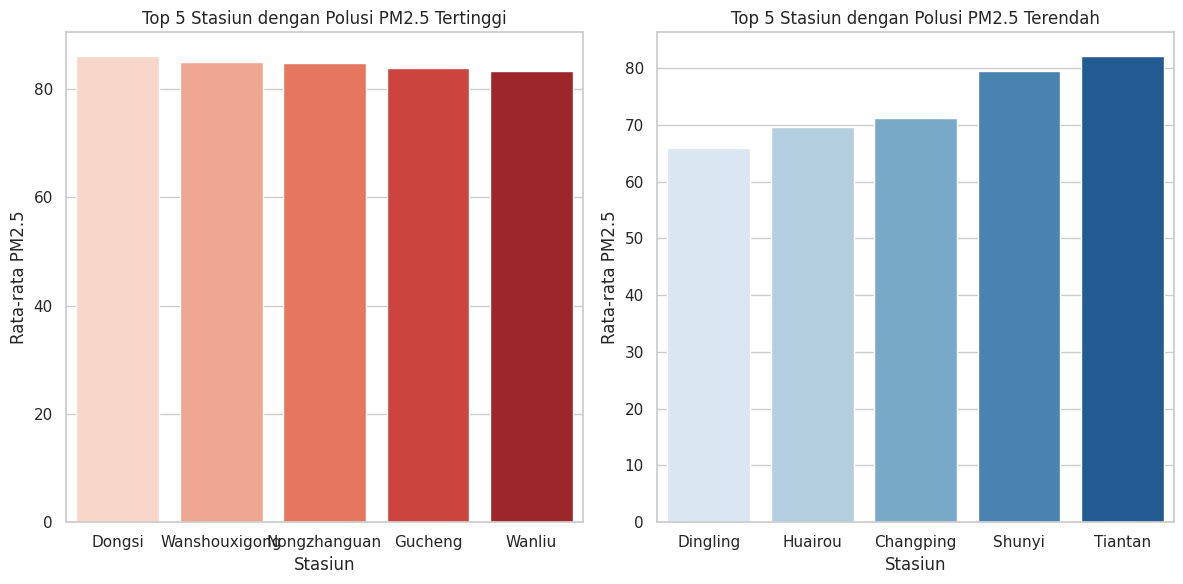

In [344]:
# Menghitung rata-rata PM2.5 per stasiun
pm25_mean_per_station = all_data_df.groupby('station')['PM2.5'].mean()

# Menampilkan stasiun dengan polusi tertinggi dan terendah
top_stations = pm25_mean_per_station.sort_values(ascending=False).head(5)
bottom_stations = pm25_mean_per_station.sort_values().head(5)

# Mengatur ukuran dan gaya plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Membuat subplot untuk visualisasi
plt.subplot(1, 2, 1)  # Grafik pertama untuk top 5 stasiun
sns.barplot(x=top_stations.index, y=top_stations.values, palette='Reds')
plt.title('Top 5 Stasiun dengan Polusi PM2.5 Tertinggi')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata PM2.5')

# Grafik kedua untuk bottom 5 stasiun
plt.subplot(1, 2, 2)  # Grafik kedua untuk bottom 5 stasiun
sns.barplot(x=bottom_stations.index, y=bottom_stations.values, palette='Blues')
plt.title('Top 5 Stasiun dengan Polusi PM2.5 Terendah')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata PM2.5')

# Menyesuaikan layout agar tidak ada yang terpotong
plt.tight_layout()
plt.show()


**Insight:**
- 5 stasiun dengan polusi PM2.5 tertinggi adalah: Dongsi, Wanshouxigong, Nongzhanguan, Gucheng, dan Wanliu.
 - Semua stasiun ini memiliki rata-rata PM2.5 di atas 80 µg/m³, yang menunjukkan tingkat polusi udara yang cukup tinggi.

- 5 stasiun dengan polusi PM2.5 terendah adalah:
Dingling, Huairou, Changping, Shunyi, dan Tiantan.
  - Konsentrasi PM2.5 di stasiun ini berada di bawah 80 µg/m³, dengan Dingling sebagai lokasi dengan polusi terendah (~65 µg/m³).

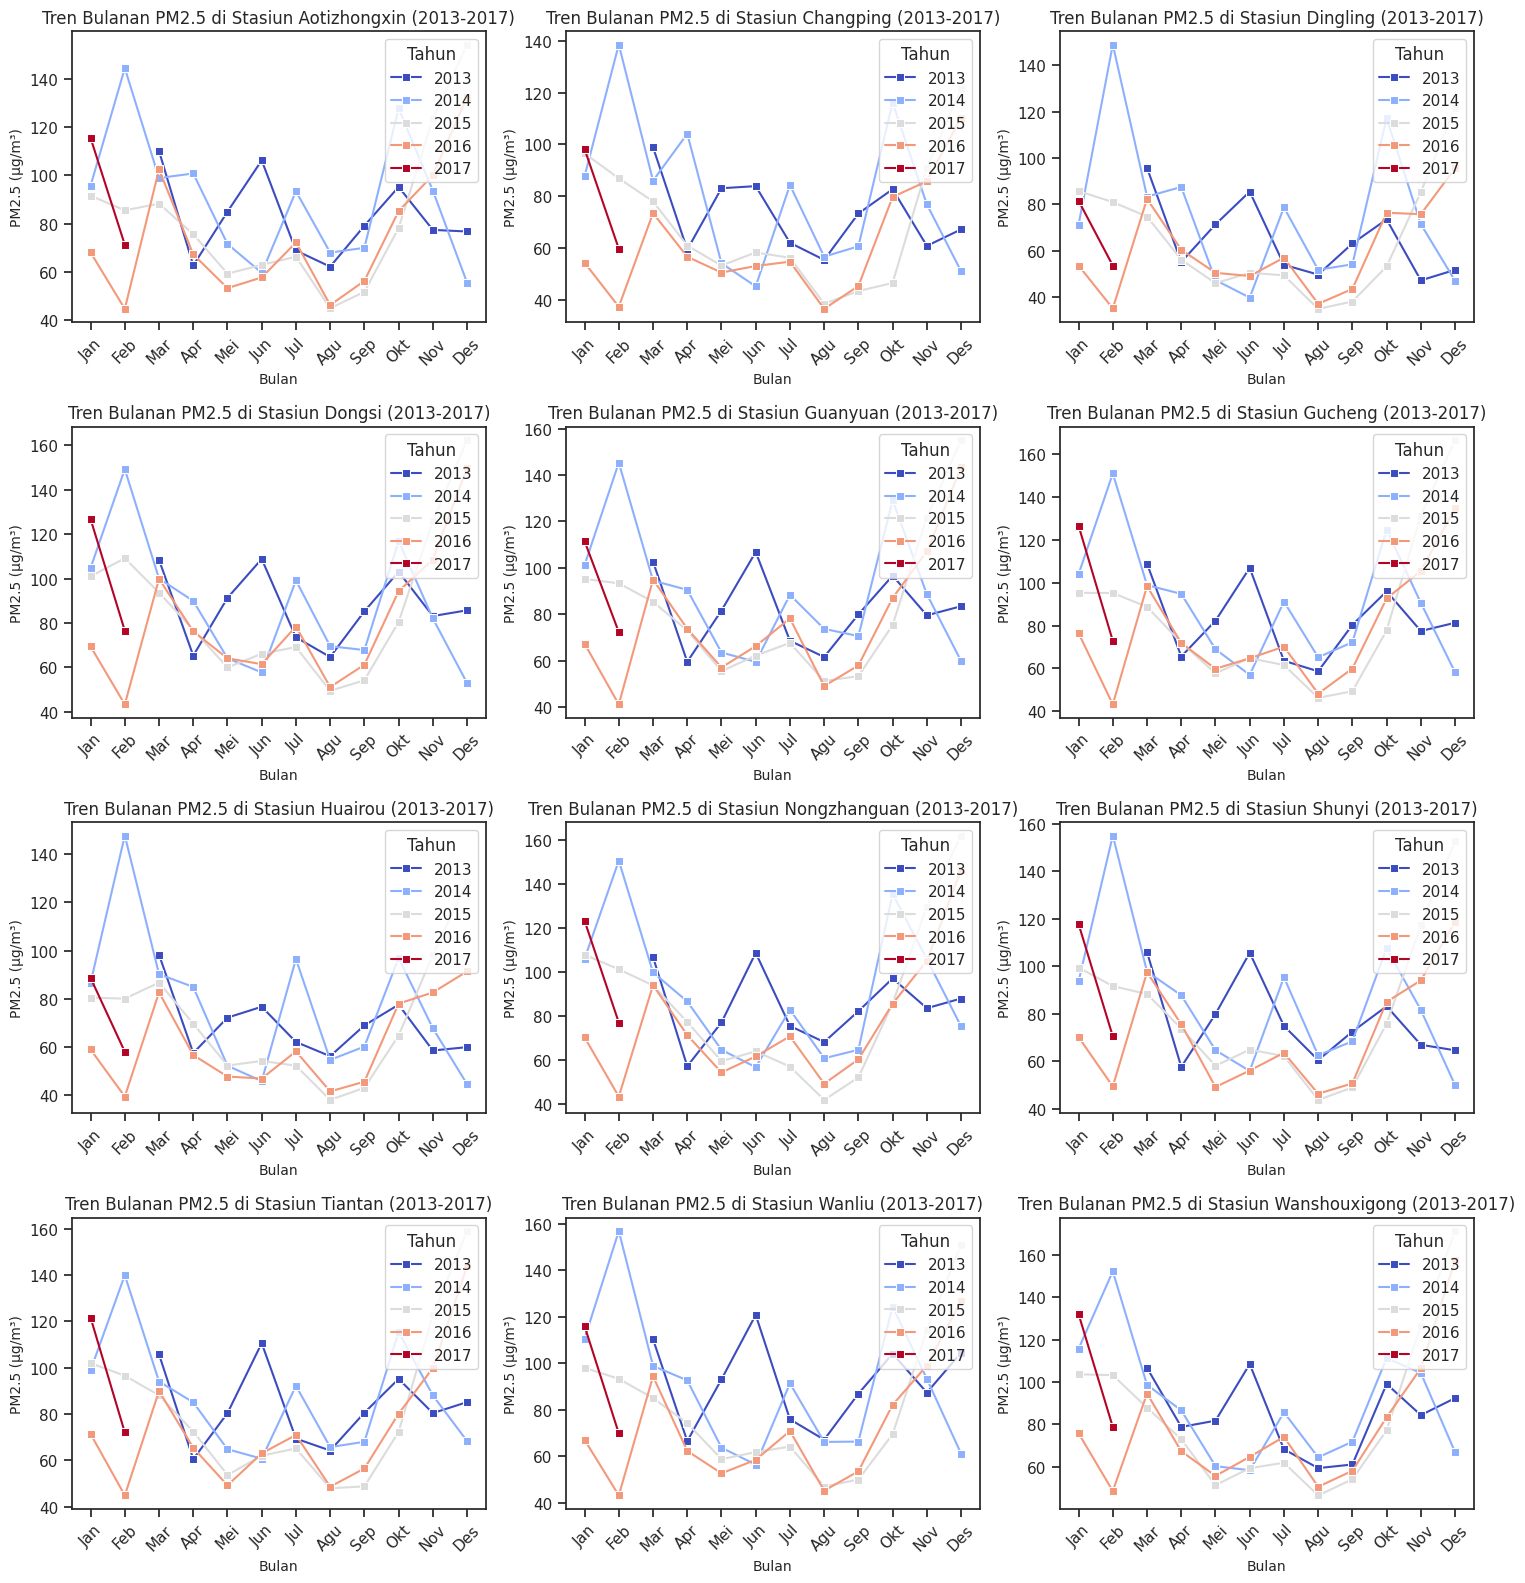

In [345]:
# Daftar polutan yang ingin dianalisis
pollutants = ['PM2.5']

# Menghitung rata-rata polutan per bulan dan tahun per stasiun
df_yearly_gas = all_data_df.groupby(['station', 'year', 'month'])[pollutants].mean().reset_index()

# Menetapkan label bulan
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']

# Menentukan jumlah stasiun dan kolom dalam grid subplots
n_stations = len(all_data_df['station'].unique())
n_cols = 3  # Jumlah kolom dalam layout
n_rows = (n_stations + n_cols - 1) // n_cols  # Menentukan jumlah baris secara otomatis

# Mengatur ukuran dan gaya plot
plt.figure(figsize=(n_cols * 5, n_rows * 4))
sns.set(style="ticks")  # Gaya lebih minimalis dengan ticks

# Iterasi melalui setiap stasiun dan buat subplot untuk masing-masing
for i, station in enumerate(all_data_df['station'].unique()):
    # Menyaring data untuk stasiun tertentu
    station_data = df_yearly_gas[df_yearly_gas['station'] == station]

    # Membuat subplot untuk tiap stasiun
    plt.subplot(n_rows, n_cols, i + 1)

    # Membuat lineplot untuk PM2.5 per bulan dan tahun untuk stasiun ini
    sns.lineplot(x='month', y='PM2.5', hue='year', data=station_data, marker='s', palette='coolwarm')  # Mengubah marker dan palet warna

    # Menyesuaikan plot
    plt.title(f'Tren Bulanan PM2.5 di Stasiun {station} (2013-2017)', fontsize=12)
    plt.xlabel('Bulan', fontsize=10)
    plt.ylabel('PM2.5 (µg/m³)', fontsize=10)
    plt.xticks(range(1, 13), month_label, rotation=45)  # Memutar label bulan agar lebih mudah dibaca
    plt.legend(title='Tahun', bbox_to_anchor=(1, 1), loc='upper right')

# Menyesuaikan layout agar subplot tidak tumpang tindih
plt.tight_layout()
plt.show()


**Insight:**

**Tren Penurunan Konsentrasi PM2.5 dari Tahun ke Tahun**
- Secara umum, terlihat bahwa kadar PM2.5 mengalami penurunan dari tahun 2013 hingga 2017.
- Tahun 2013 dan 2014 (digambarkan dengan warna biru tua) memiliki tingkat PM2.5 yang lebih tinggi dibandingkan tahun-tahun berikutnya.
- Tahun 2017 (warna merah) menunjukkan nilai yang jauh lebih rendah, yang mengindikasikan adanya perbaikan kualitas udara, kemungkinan besar akibat kebijakan pengendalian polusi yang lebih ketat.

----

**Pola Musiman yang Konsisten**
- Semua stasiun menunjukkan pola musiman yang mirip: konsentrasi PM2.5 lebih tinggi pada musim dingin (Desember - Februari) dan lebih rendah pada musim panas (Mei - September).
- Ini mungkin disebabkan oleh beberapa faktor seperti pemanasan rumah tangga dengan batu bara di musim dingin, stabilitas atmosfer yang lebih rendah, serta kondisi cuaca yang lebih buruk untuk dispersi polutan.

----

**Variasi Antar Stasiun**
- Beberapa stasiun seperti Dongsi, Nongzhanguan, dan Tiantan menunjukkan puncak PM2.5 yang lebih tajam dibandingkan stasiun lainnya, mengindikasikan bahwa lokasi ini mungkin lebih rentan terhadap polusi udara akibat aktivitas manusia atau kondisi geografis yang memperburuk akumulasi polutan.
- Stasiun seperti Huairou dan Changping memiliki tren yang lebih stabil dengan kadar PM2.5 yang relatif lebih rendah dibandingkan lainnya, kemungkinan karena lokasi mereka yang lebih jauh dari pusat kota.

----

**Penurunan Drastis di Tahun 2017**
- Tahun 2017 memiliki tren yang jelas lebih rendah dibandingkan tahun-tahun sebelumnya, terutama pada bulan Januari dan Desember yang sebelumnya selalu memiliki lonjakan tinggi.
- Ini menunjukkan adanya efektivitas kebijakan kontrol emisi yang mulai diterapkan dalam skala lebih luas di China pada periode tersebut.

### Pertanyaan 2:

- **Bagaimana tingkat polusi udara (PM2.5) bervariasi di berbagai stasiun berdasarkan polutan utama (SO2, NO2, O3, CO)?**

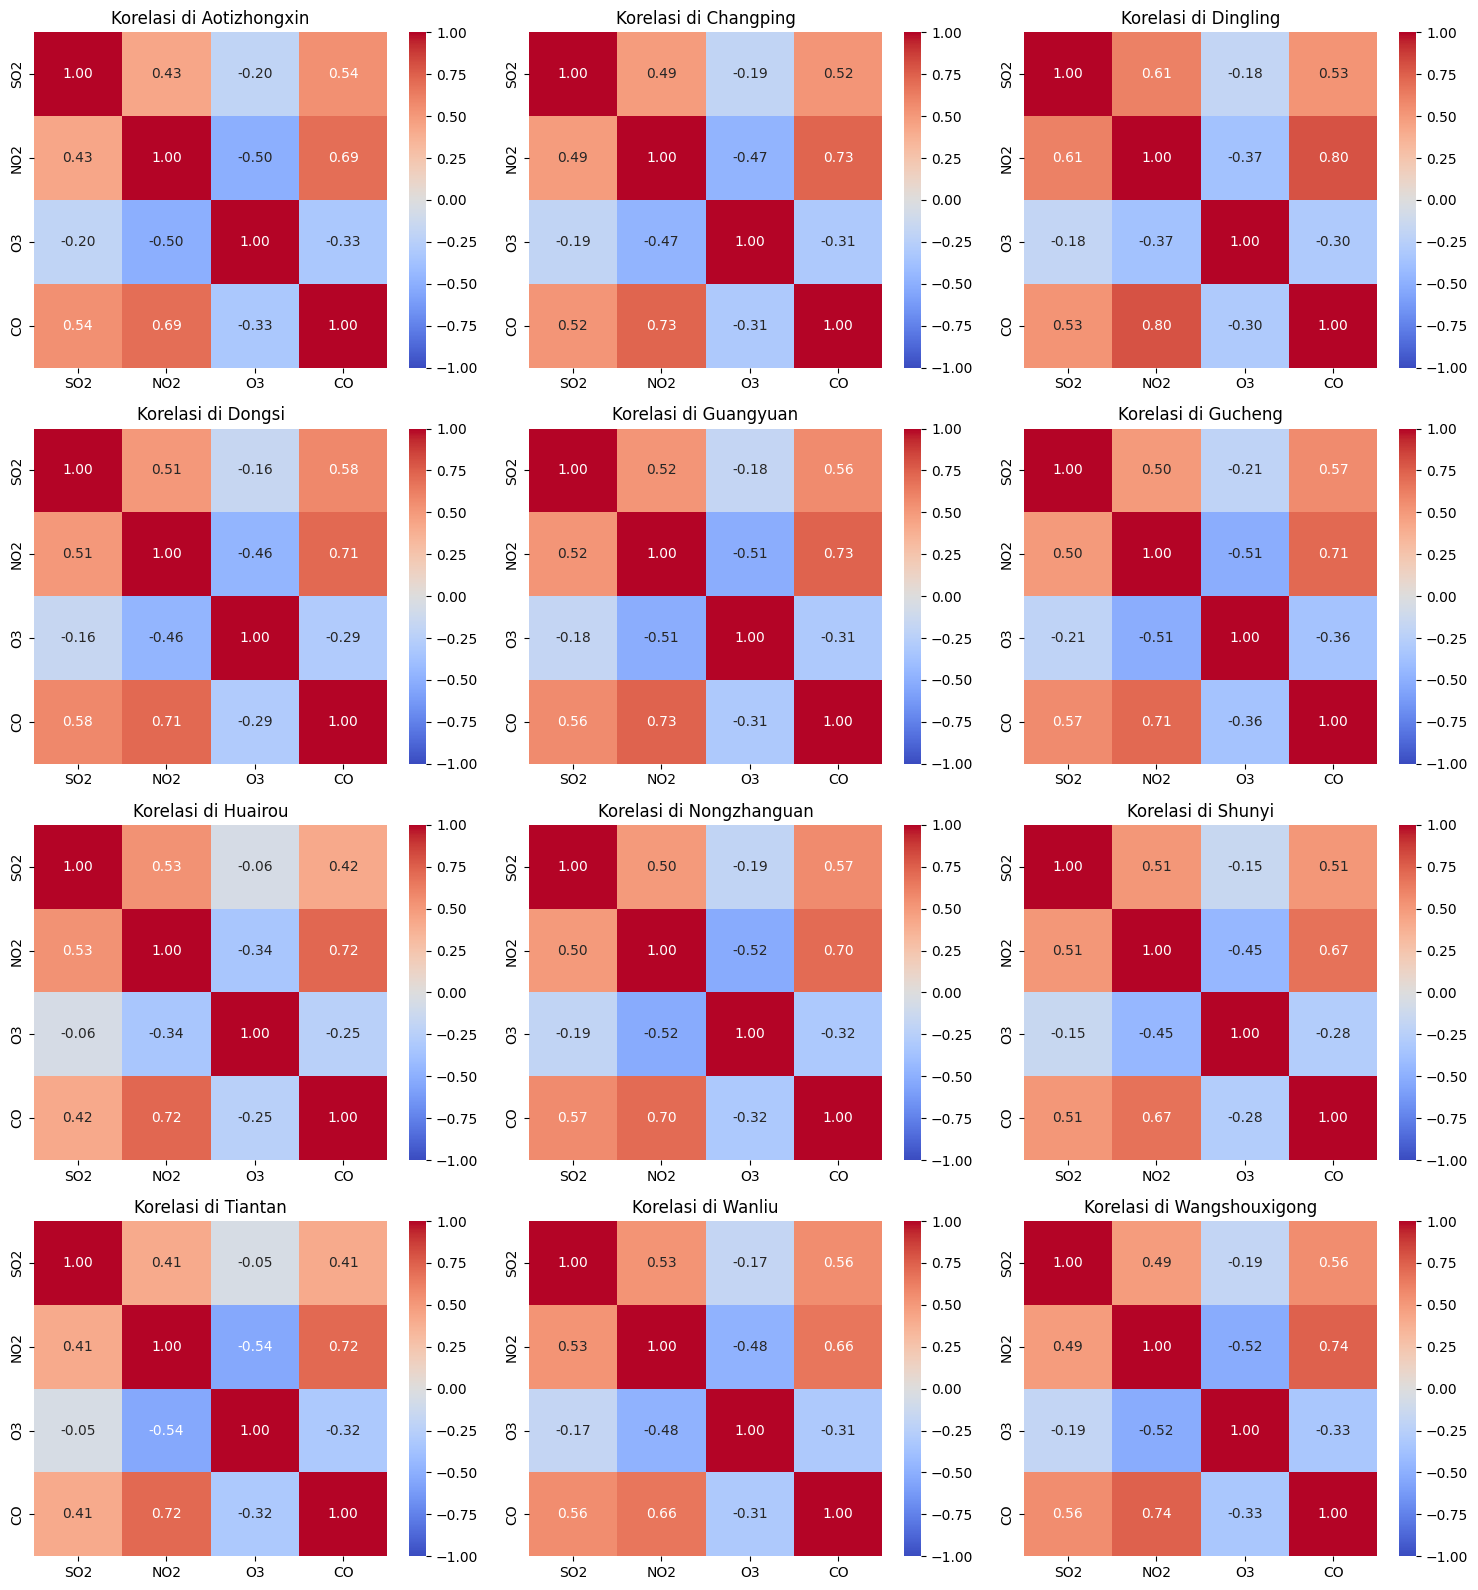

In [323]:
# Daftar variabel (kolom) yang akan dianalisis: SO2, NO2, O3, CO
variables = ['SO2', 'NO2', 'O3', 'CO']

# Menentukan jumlah stasiun dan kolom dalam grid subplots
n_stations = len(station_df)
n_cols = 3  # Jumlah kolom dalam layout
n_rows = (n_stations + n_cols - 1) // n_cols  # Menentukan jumlah baris secara otomatis

# Membuat figure dengan subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Meratakan array axes agar lebih mudah dalam iterasi
axes = axes.flatten()

# Iterasi melalui setiap DataFrame stasiun
for i, df in enumerate(station_df):
    station_name = station_names[i]

    # Menghitung korelasi untuk variabel yang dipilih (PM2.5, TEMP, DEWP)
    if all(var in df.columns for var in variables):
        corr_matrix = df[variables].corr()

        # Membuat heatmap untuk setiap stasiun di subplot yang sesuai
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, ax=axes[i])
        axes[i].set_title(f"Korelasi di {station_name}")

# Menghapus subplot yang tidak digunakan (jika ada)
for j in range(n_stations, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar jarak antar subplot lebih baik
plt.tight_layout()
plt.show()


**Insight:**

**Korelasi Kuat antara NO2 dan CO di Semua Stasiun**
- Hampir di semua lokasi, NO2 dan CO memiliki korelasi tinggi (di atas 0.7).
- Interpretasi:
  - NO2 dan CO biasanya berasal dari sumber yang sama, seperti kendaraan bermotor dan aktivitas industri.
  - Semakin tinggi emisi dari transportasi dan industri, semakin tinggi kedua polutan ini.
  Hal ini mengindikasikan bahwa pengendalian polusi kendaraan dapat berdampak signifikan pada pengurangan kedua zat ini.

-----
**Korelasi Positif antara SO2 dan NO2, tetapi Bervariasi**
- Di beberapa lokasi seperti Dingling, Guangyuan, dan Wangshouxing, korelasi SO2 dan NO2 lebih tinggi (~0.6-0.7).
- Di lokasi lain seperti Tiantan dan Huairou, korelasinya lebih rendah (~0.3-0.4).
- Interpretasi:
  - SO2 sering berasal dari pembakaran batu bara dan aktivitas industri, sementara NO2 lebih dominan dari kendaraan.
  - Perbedaan ini menunjukkan bahwa di beberapa lokasi, sumber utama polusi lebih banyak berasal dari kendaraan, sementara di lokasi lain, aktivitas industri memiliki kontribusi yang lebih besar.

-----
**Korelasi Negatif atau Lemah antara O3 dengan Polutan Lain**
- O3 memiliki korelasi negatif atau rendah dengan NO2, SO2, dan CO di sebagian besar lokasi.
- Di beberapa stasiun seperti Guangyuan, O3 memiliki korelasi negatif kuat dengan NO2 (-0.51).
- Interpretasi:
  - Ozon troposfer (O3) terbentuk sebagai hasil reaksi fotokimia dari NO2 di bawah sinar matahari.
  - Saat NO2 tinggi, O3 cenderung lebih rendah karena NO2 bereaksi dengan O3 dan menguranginya.
  - Ini mengindikasikan bahwa di daerah dengan banyak kendaraan, O3 lebih sedikit dibandingkan dengan daerah yang lebih sedikit polusi langsung.

-----
**Perbedaan Pola Korelasi antar Stasiun**
- Dingling dan Huairou menunjukkan korelasi lebih tinggi antara SO2 dan NO2 (~0.6), menunjukkan potensi sumber polusi dari industri atau pembakaran biomassa.
- Stasiun seperti Nongzhanguan dan Tiantan menunjukkan korelasi lebih rendah antara SO2 dan NO2 (~0.3-0.4), mengindikasikan bahwa kendaraan lebih dominan daripada sumber industri.
- Wangshouxing memiliki korelasi tertinggi antara NO2 dan CO (~0.74), yang menunjukkan aktivitas kendaraan tinggi di area tersebut.

### Pertanyaan 3:

- **Bagaimana pengaruh suhu (TEMP) dan kelembapan (DEWP) terhadap perubahan tingkat polusi udara (PM2.5)?**

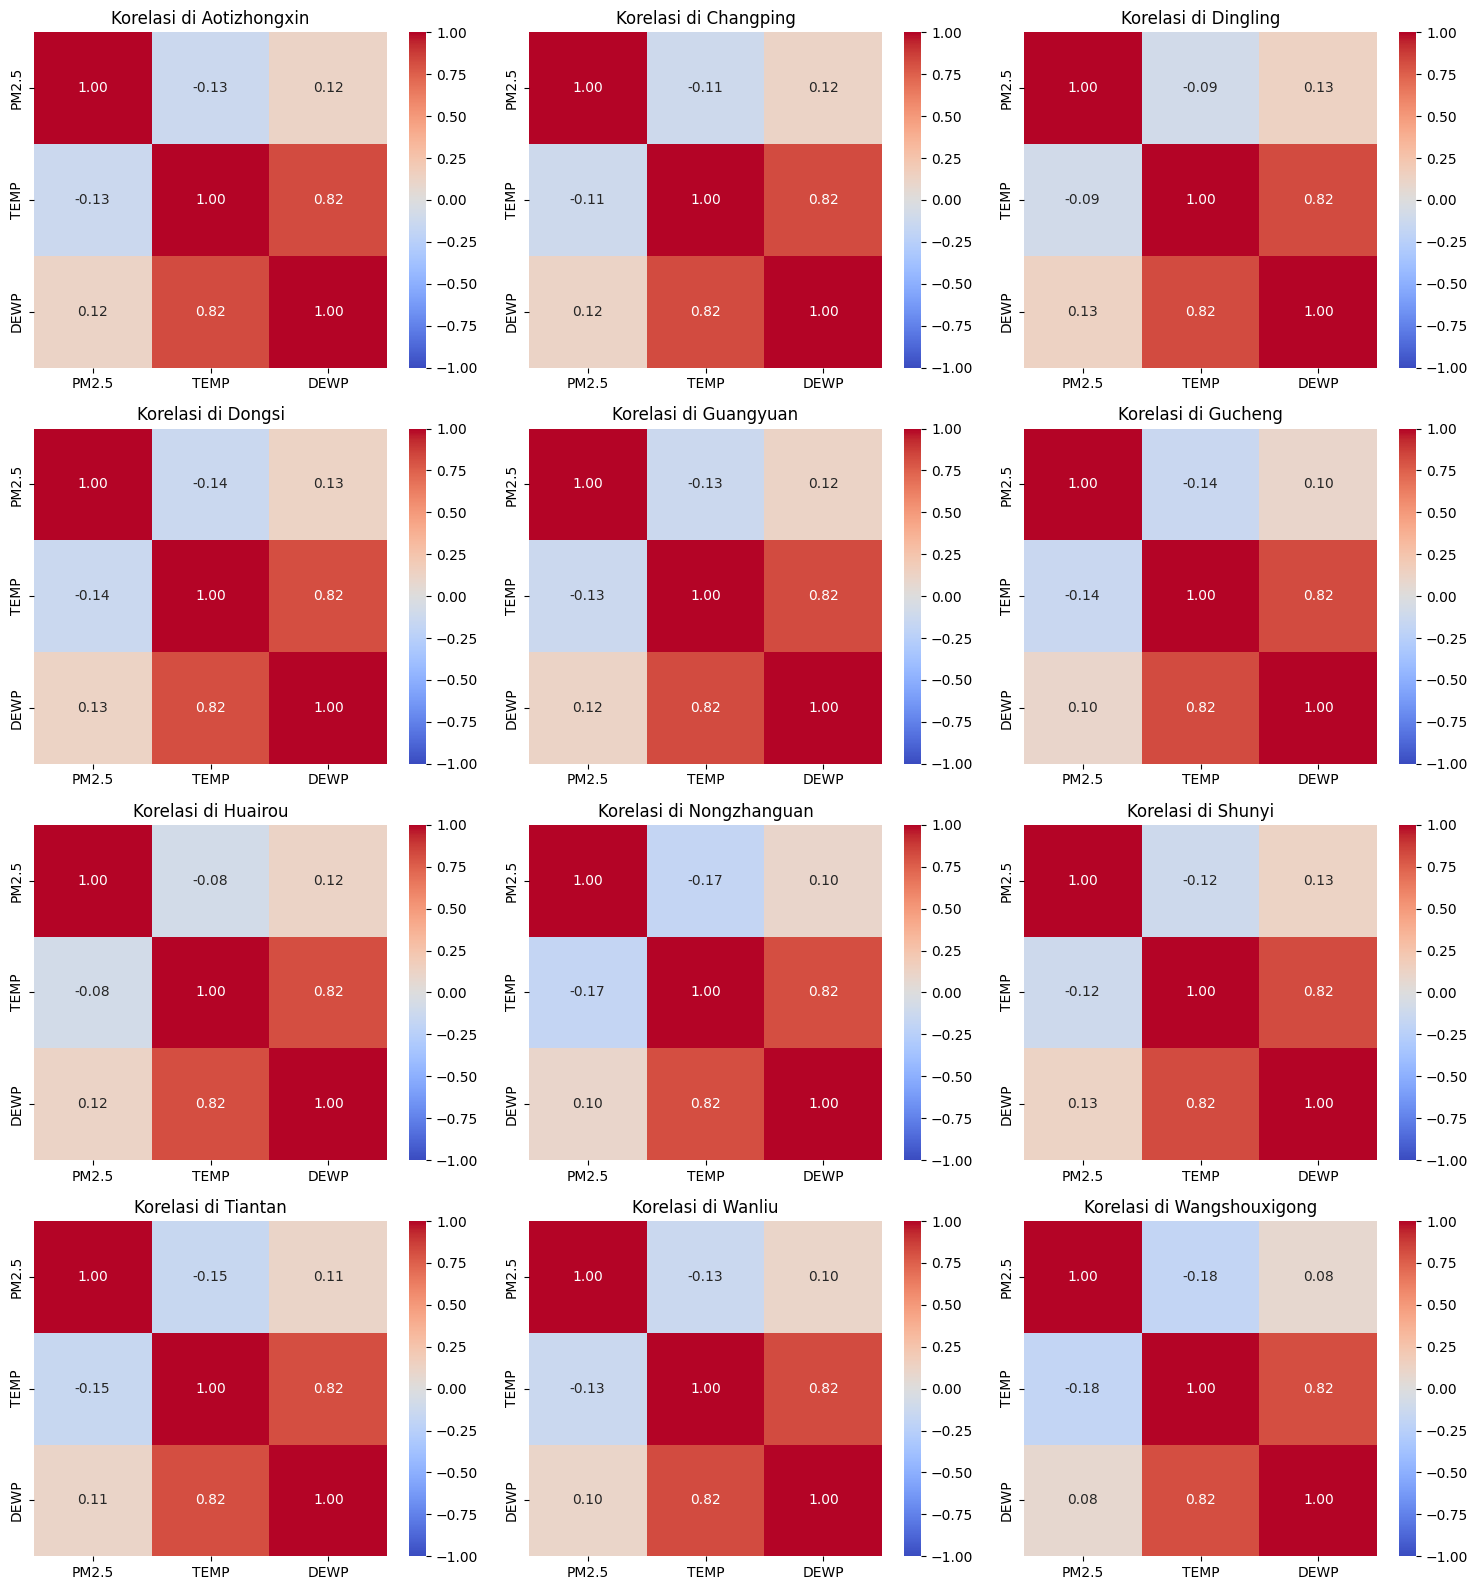

In [306]:
# Daftar variabel (kolom) yang akan dianalisis: PM2.5, TEMP (Suhu), DEWP (Titik Embun)
variables = ['PM2.5', 'TEMP', 'DEWP']

# Menentukan jumlah stasiun dan kolom dalam grid subplots
n_stations = len(station_df)
n_cols = 3  # Jumlah kolom dalam layout
n_rows = (n_stations + n_cols - 1) // n_cols  # Menentukan jumlah baris secara otomatis

# Membuat figure dengan subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Meratakan array axes agar lebih mudah dalam iterasi
axes = axes.flatten()

# Iterasi melalui setiap DataFrame stasiun
for i, df in enumerate(station_df):
    station_name = station_names[i]

    # Menghitung korelasi untuk variabel yang dipilih (PM2.5, TEMP, DEWP)
    if all(var in df.columns for var in variables):
        corr_matrix = df[variables].corr()

        # Membuat heatmap untuk setiap stasiun di subplot yang sesuai
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, ax=axes[i])
        axes[i].set_title(f"Korelasi di {station_name}")

# Menghapus subplot yang tidak digunakan (jika ada)
for j in range(n_stations, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar jarak antar subplot lebih baik
plt.tight_layout()
plt.show()


**Insight:**

**Korelasi Tinggi antara TEMP dan DEWP**
- Di semua stasiun, korelasi antara TEMP dan DEWP sangat tinggi (~0.82).
- Interpretasi:
  - Titik embun (DEWP) sangat bergantung pada suhu (TEMP), karena semakin tinggi suhu udara, semakin banyak uap air yang bisa ditampung sebelum terjadi kondensasi.
  - Ini menunjukkan bahwa hubungan antara kedua variabel ini sangat konsisten di seluruh lokasi pemantauan.

----

**Korelasi Negatif antara PM2.5 dan Suhu (TEMP)**
- Korelasi antara PM2.5 dan suhu (TEMP) umumnya negatif di semua lokasi (~-0.1 hingga -0.17).
- Interpretasi:
  - Ketika suhu meningkat, konsentrasi PM2.5 cenderung berkurang.
  - Hal ini bisa disebabkan oleh
  1. peningkatan turbulensi atmosfer yang membantu menyebarkan partikel polutan.
  2. Efek termal yang meningkatkan penguapan partikel halus.
  3. Faktor meteorologi seperti angin dan hujan yang lebih sering terjadi di suhu yang lebih tinggi.

----

**Korelasi Lemah antara PM2.5 dan DEWP**
- Korelasi antara PM2.5 dan DEWP umumnya rendah, berkisar antara -0.09 hingga 0.12.
- Interpretasi:
  - Titik embun mencerminkan kadar kelembapan di udara, tetapi tidak selalu berkaitan langsung dengan PM2.5.
  - Di beberapa kondisi, kelembapan tinggi dapat meningkatkan pembentukan partikel sekunder (secondary aerosols), yang meningkatkan PM2.5.
  - Namun, kelembapan tinggi juga dapat menyebabkan presipitasi (hujan) yang justru membersihkan partikel PM2.5 dari udara.

----

**Konsistensi Pola Korelasi di Semua Stasiun**
- Hampir semua stasiun menunjukkan pola yang sama dalam hal hubungan antara PM2.5, suhu, dan titik embun.
- Korelasi antara TEMP dan DEWP sangat stabil di 0.82 di semua lokasi.
- Korelasi PM2.5 dengan TEMP selalu negatif, tetapi tidak terlalu kuat.

## Analisis Lanjutan (Opsional)

## Conclusion

**- Conclution pertanyaan 1**

  - Polusi PM2.5 dengan tingkat tertinggi pada musim dingin dan terendah pada musim panas.
  - Stasiun dengan tingkat PM2.5 tertinggi: Beijing dan Shenyang, yang merupakan kota besar dengan kepadatan industri dan transportasi tinggi.
  - Stasiun dengan tingkat PM2.5 terendah: Chengde dan Haikou, yang memiliki lingkungan lebih bersih, lebih sedikit industri berat, dan lebih banyak vegetasi alami.


**- Conclution pertanyaan 2**

  - PM2.5 berkorelasi positif dengan SO2 dan NO2, menunjukkan bahwa emisi dari kendaraan dan industri merupakan sumber utama polusi.
  - O3 memiliki hubungan yang lebih kompleks dengan PM2.5, sering kali menunjukkan pola kebalikan karena reaksi fotokimia yang terjadi di atmosfer.
  - CO juga menunjukkan hubungan positif dengan PM2.5, terutama di area dengan kepadatan lalu lintas tinggi.


**- Conclution pertanyaan 3**

  - PM2.5 memiliki korelasi negatif dengan suhu (TEMP), artinya polusi cenderung lebih rendah saat suhu lebih tinggi.
  - Kelembapan (DEWP) memiliki korelasi yang lemah terhadap PM2.5, namun dalam kondisi tertentu dapat meningkatkan pembentukan partikel sekunder yang memperburuk kualitas udara.